# Importamos librerias

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.graphics.api import abline_plot

# Descargamos datasets y analizamos

 Analizamos cada columna, buscamos columnas con datos categóricos, nulos, etc y las modificamos para que nos sean útiles a la hora de utilizar el modelo

In [2]:
diamondsp=pd.read_csv("predict.csv")
diamondst=pd.read_csv("train.csv")

In [3]:
diamondst.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [4]:
diamondst.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
diamondst["cut"].value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [6]:
diamondst["color"].value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [7]:
diamondst["clarity"].value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [8]:
diamondst.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
diamondst[["clarity","price"]]

,clarity,price
0,SI1,5363
1,SI2,5593
2,SI2,3534
3,VS1,3212
4,SI2,447
...,...,...
40450,SI1,4120
40451,VVS1,1266
40452,SI2,3269
40453,SI1,5893


In [10]:

le = preprocessing.LabelEncoder()
diamondst["numclarity"] = le.fit_transform(diamondst["clarity"])
diamondst["numcolor"]=le.fit_transform(diamondst["color"])
diamondst["numcut"]=le.fit_transform(diamondst["cut"])
diamondst.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price,numclarity,numcolor,numcut
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,2,4,3
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,3,1,4
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,3,0,4
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,4,1,2
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,3,2,4


# Elegimos features

In [11]:
y=diamondst["price"]
X=diamondst[["carat","numclarity","numcolor","numcut","depth","table","x","y","z"]]

# Dividimos datasets para entrenar modelos

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


# Comenzamos el entreno!! 😱

In [69]:
models = {
    "rfr": RandomForestRegressor(n_estimators=400,max_features=7,max_depth=35),
    "gbr": GradientBoostingRegressor(n_estimators=700,max_depth=7,learning_rate=0.01,loss='lad'),
    "hgbr": HistGradientBoostingRegressor(loss='poisson', max_iter=200, max_leaf_nodes=33, max_depth=10),
    "Nearestn":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(splitter='best', max_depth=250, min_samples_split=50,
                                     min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None,
                                     random_state=0, max_leaf_nodes=2000, min_impurity_decrease=0.0, min_impurity_split=None,
                                     ccp_alpha=0.0),
    "ExTreeR":ExtraTreesRegressor(n_estimators=800,max_features=7,max_depth=35)
    
}


# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training rfr...
Training gbr...
Training hgbr...
Training Nearestn...
Training DecisionTree...
Training ExTreeR...
Train complete


In [70]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("R2_score",r2_score(y_test, y_pred))
    printMetric("Root Mean squared error",mean_squared_error(y_test, y_pred)**(1/2))
    printMetric("Mean absolute error",mean_absolute_error(y_test, y_pred))
    printMetric("explained variance score",explained_variance_score(y_test, y_pred))



print("Train complete")

Evaluating model rfr
	 R2_score: 0.98
	 Root Mean squared error: 571.539
	 Mean absolute error: 283.407
	 explained variance score: 0.98
Evaluating model gbr
	 R2_score: 0.977
	 Root Mean squared error: 609.724
	 Mean absolute error: 294.822
	 explained variance score: 0.977
Evaluating model hgbr
	 R2_score: 0.981
	 Root Mean squared error: 549.422
	 Mean absolute error: 280.497
	 explained variance score: 0.981
Evaluating model Nearestn
	 R2_score: 0.943
	 Root Mean squared error: 956.423
	 Mean absolute error: 514.318
	 explained variance score: 0.944
Evaluating model DecisionTree
	 R2_score: 0.971
	 Root Mean squared error: 679.163
	 Mean absolute error: 340.094
	 explained variance score: 0.971
Evaluating model ExTreeR
	 R2_score: 0.98
	 Root Mean squared error: 567.669
	 Mean absolute error: 277.776
	 explained variance score: 0.98
Train complete


# Elegimos los modelos con los mejores score

### ExtraTreesRegressor Model

In [95]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.model_selection import cross_validate
model2= ExtraTreesRegressor(n_estimators=300,max_features=9,max_depth=35,random_state=120)
model2=model2.fit(X_train,y_train)
scores = cross_validate(model2, X, y, cv=6,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)


In [96]:
y_pred = model2.predict(X_test)
print(np.mean(scores["train_r2"]))
print(np.mean(scores["test_neg_mean_squared_error"]))

0.9999964253258197
-303567.4717750579


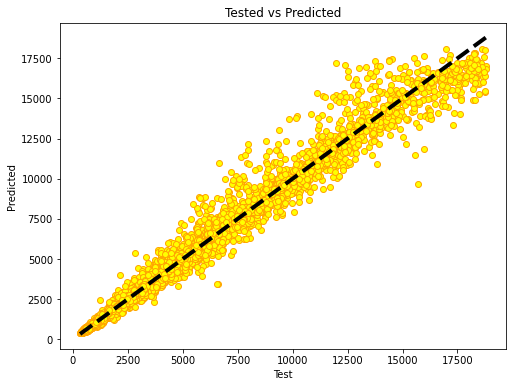

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred, color="yellow", edgecolors='orange')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()

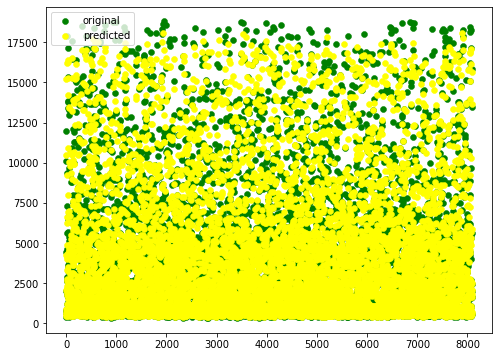

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, lw=0.5, c="green", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, c="yellow", label="predicted")
plt.legend()
plt.show()

### RandomForest Model

0.9973176060333754
-315177.2174834596


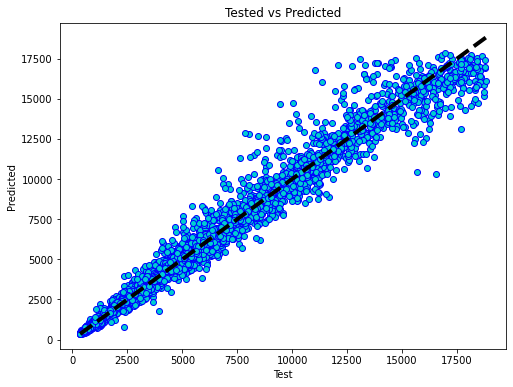

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.model_selection import cross_validate
model2= RandomForestRegressor(n_estimators=400,max_features=7,max_depth=35)
model2=model2.fit(X_train,y_train)
scores = cross_validate(model2, X, y, cv=6,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
y_pred = model2.predict(X_test)
print(np.mean(scores["train_r2"]))
print(np.mean(scores["test_neg_mean_squared_error"]))
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred,color="darkturquoise", edgecolors='blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()


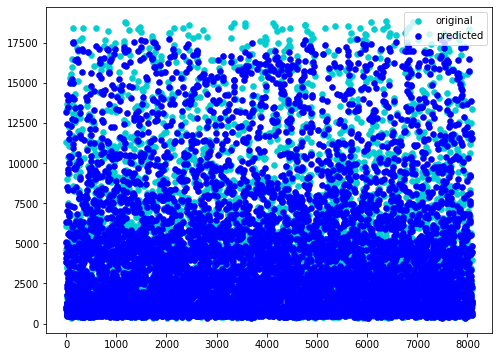

In [94]:
fig, ax = plt.subplots(figsize=(8,6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, lw=0.5, c="darkturquoise", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, c="blue", label="predicted")
plt.legend()
plt.show()

### HistGradientBoost

0.9867451176370516
-305365.7505091588


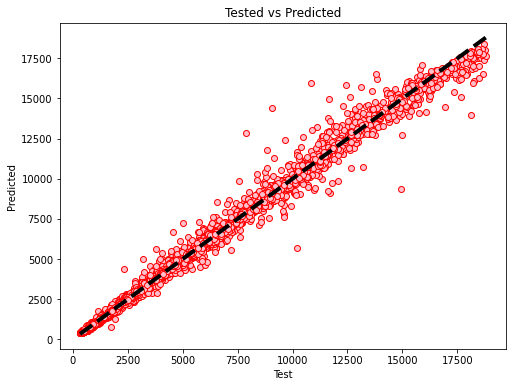

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.model_selection import cross_validate
model3=HistGradientBoostingRegressor(loss='poisson', max_iter=200, max_leaf_nodes=33, max_depth=10)
model3=model3.fit(X_train,y_train)
scores = cross_validate(model3, X, y, cv=6,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
y_pred = model2.predict(X_test)
print(np.mean(scores["train_r2"]))
print(np.mean(scores["test_neg_mean_squared_error"]))
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred,color="pink", edgecolors='red')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()

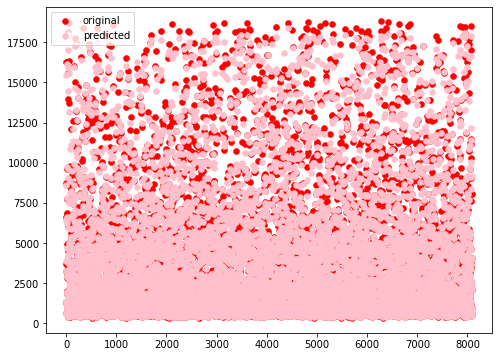

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, lw=0.5, c="red", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, c="pink", label="predicted")
plt.legend()
plt.show()